In [1]:
import pandas as pd        # for handling data
import numpy as np         # for numerical operations
import matplotlib.pyplot as plt   # for plotting
import seaborn as sns      # for better visualizations
from sklearn.preprocessing import LabelEncoder

# Load the CSV file
df = pd.read_csv(r"C:\Users\sarah\Downloads\student_stress_survey.csv")  # make sure the CSV is in the same folder as this script
print(df.head())  # Show the first few rows of the data


          Timestamp  Score                 Name Your current year of study  \
0  26-05-2025 19:07    NaN            Sarah S V                   3rd year   
1  26-05-2025 19:20    NaN                Laksh                   3rd year   
2  26-05-2025 19:21    NaN           Sanjanaa S                   3rd year   
3  26-05-2025 19:22    NaN              Jasmine                         CA   
4  26-05-2025 19:23    NaN  K SNEHA SUCHARITHA                    3rd year   

  Your gender (optional)  \
0                 Female   
1                 Female   
2                 Female   
3                 Female   
4                 Female   

  What's your total screen time for a day?  (Work,YouTube, Netflix, gaming, etc.)   \
0                                         7-10 hours                                 
1                                         7-10 hours                                 
2                                  less than 3 hours                                 
3                 

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 20 columns):
 #   Column                                                                                                                                           Non-Null Count  Dtype  
---  ------                                                                                                                                           --------------  -----  
 0   Timestamp                                                                                                                                        38 non-null     object 
 1   Score                                                                                                                                            0 non-null      float64
 2   Name                                                                                                                                             38 non-null     object 
 3   Your current year of s

In [3]:
print(df.shape)

(38, 20)


C:\Users\sarah\AppData\Local\Temp\ipykernel_15508\837611721.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='which_of_the_following_best_describes_your_primary_study_method', order=df['which_of_the_following_best_describes_your_primary_study_method'].value_counts().index, palette='viridis')


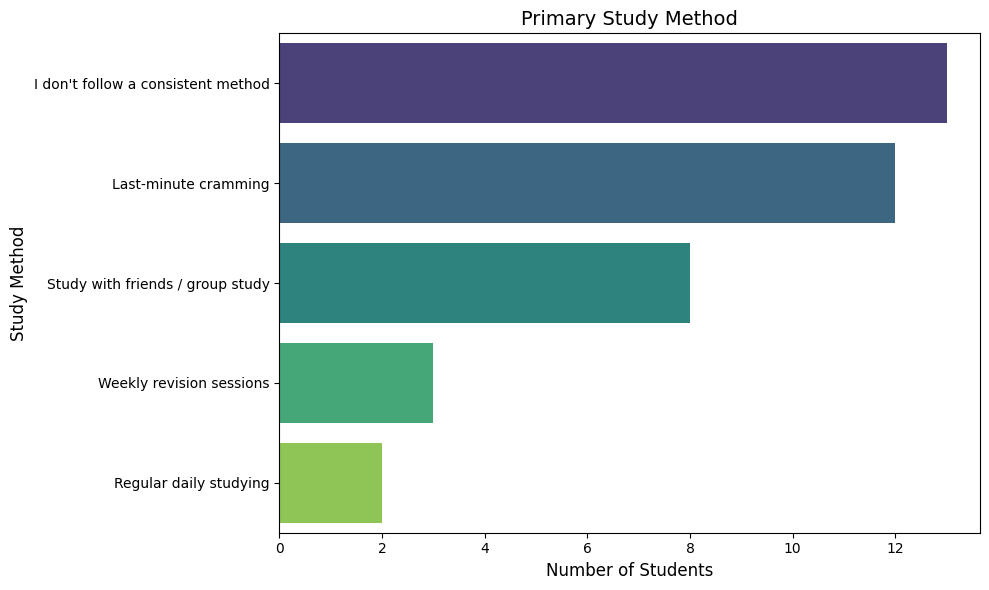

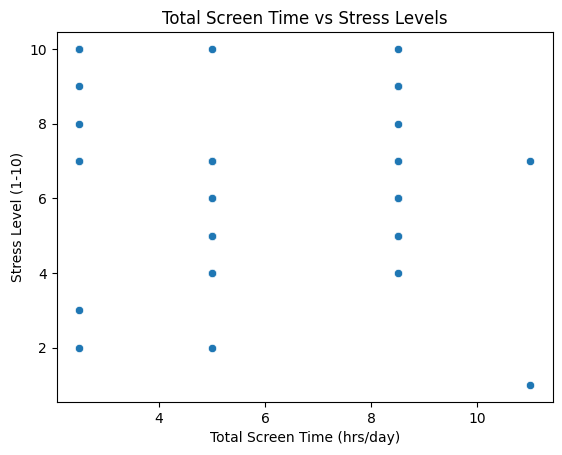

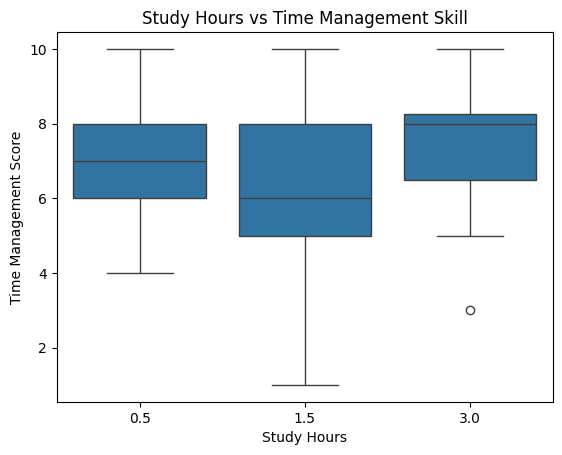

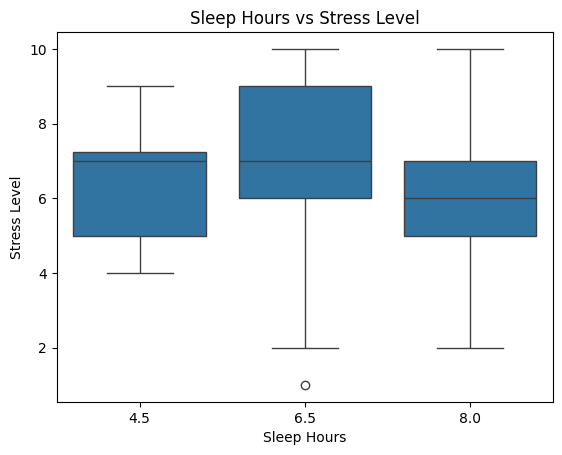

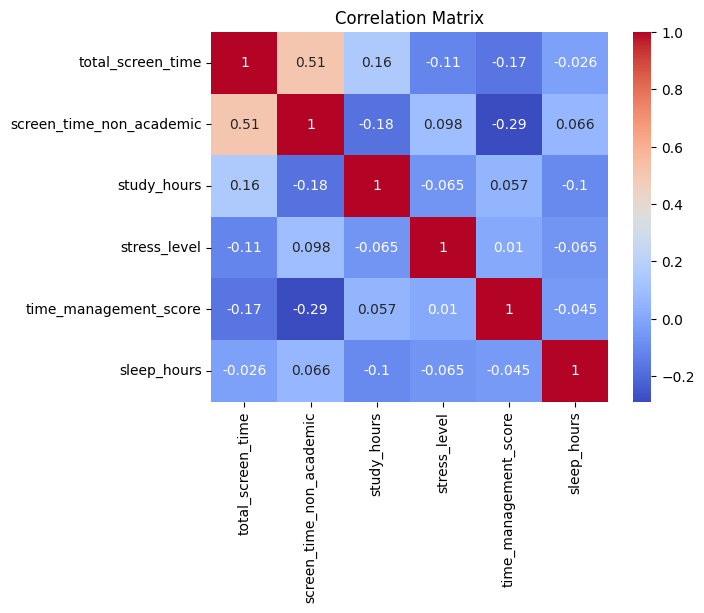

          timestamp  score                 name your_current_year_of_study  \
0  26-05-2025 19:07    NaN            Sarah S V                   3rd year   
1  26-05-2025 19:20    NaN                Laksh                   3rd year   
2  26-05-2025 19:21    NaN           Sanjanaa S                   3rd year   
3  26-05-2025 19:22    NaN              Jasmine                         CA   
4  26-05-2025 19:23    NaN  K SNEHA SUCHARITHA                    3rd year   

  your_gender_optional  total_screen_time  screen_time_non_academic  \
0               Female                8.5                       6.0   
1               Female                8.5                       6.0   
2               Female                2.5                       3.0   
3               Female                5.0                       3.0   
4               Female                5.0                       3.0   

   sleep_hours  stress_level  \
0          6.5             6   
1          6.5             4   
2       

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv(r"C:\Users\sarah\Downloads\student_stress_survey.csv",encoding='cp1252')


# 2. Clean column names: strip, lowercase, remove punctuation, replace spaces with _
df = df.map(lambda x: x.replace('â€™', "'").replace('â€“', '-') if isinstance(x, str) else x)

df.columns = (
    df.columns
    .str.encode('ascii', 'ignore')  # remove weird non-ASCII characters like ‘â€“’
    .str.decode('ascii')            # decode back safely from ASCII
    .str.strip()
    .str.lower()
    .str.replace(r'[^\w\s]', '', regex=True)
    .str.replace(r'\s+', '_', regex=True)
)


# 3. Duration maps for mapping string responses to numeric values (all lowercase keys)
total_screen_time_map = {
    'less than 3 hours': 2.5,
    '4-6 hours': 5,
    '7-10 hours': 8.5,
    'more than 10 hours': 11
}

screen_time_non_academic_map = {
    'less than 2 hours': 1.5,
    '2-4 hours': 3,
    '5-7 hours': 6,
    '8+ hours': 9
}

sleep_hours_map = {
    'less than 4 hours': 3,
    '4-5 hours': 4.5,
    '6-7 hours': 6.5,
    '8 or more hours': 8
}

learning_hours_map = {
    'less than 1 hour': 0.5,
    '1-2 hours': 1.5,
    'more than 2 hours': 3
}

# 4. Map the cleaned columns to numeric durations (make sure columns exist)
df['whats_your_total_screen_time_for_a_day_workyoutube_netflix_gaming_etc'] = (
    df['whats_your_total_screen_time_for_a_day_workyoutube_netflix_gaming_etc']
    .str.lower()
    .map(total_screen_time_map)
)

df['how_many_hours_do_you_spend_on_screens_per_day_excluding_academic_work'] = (
    df['how_many_hours_do_you_spend_on_screens_per_day_excluding_academic_work']
    .str.lower()
    .map(screen_time_non_academic_map)
)

df['how_many_hours_do_you_sleep_on_an_average'] = (
    df['how_many_hours_do_you_sleep_on_an_average']
    .str.lower()
    .map(sleep_hours_map)
)

df['how_many_hours_a_day_do_you_spend_learning_on_average'] = (
    df['how_many_hours_a_day_do_you_spend_learning_on_average']
    .str.lower()
    .map(learning_hours_map)
)

# 5. For convenience, rename columns for plotting and analysis
df.rename(columns={
    'whats_your_total_screen_time_for_a_day_workyoutube_netflix_gaming_etc': 'total_screen_time',
    'how_many_hours_do_you_spend_on_screens_per_day_excluding_academic_work': 'screen_time_non_academic',
    'how_many_hours_do_you_sleep_on_an_average': 'sleep_hours',
    'how_many_hours_a_day_do_you_spend_learning_on_average': 'study_hours',
    'how_would_you_rate_your_current_stress_levels': 'stress_level',
    'how_would_you_rate_your_time_management_skills_overall': 'time_management_score'
}, inplace=True)

# 6. Basic Visualizations

plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='which_of_the_following_best_describes_your_primary_study_method', order=df['which_of_the_following_best_describes_your_primary_study_method'].value_counts().index, palette='viridis')
plt.title('Primary Study Method', fontsize=14)
plt.xlabel('Number of Students', fontsize=12)
plt.ylabel('Study Method', fontsize=12)
plt.tight_layout()
plt.show()

sns.scatterplot(data=df, x='total_screen_time', y='stress_level')
plt.title("Total Screen Time vs Stress Levels")
plt.xlabel("Total Screen Time (hrs/day)")
plt.ylabel("Stress Level (1-10)")
plt.show()

sns.boxplot(x='study_hours', y='time_management_score', data=df)
plt.title("Study Hours vs Time Management Skill")
plt.xlabel("Study Hours")
plt.ylabel("Time Management Score")
plt.show()

sns.boxplot(x='sleep_hours', y='stress_level', data=df)
plt.title("Sleep Hours vs Stress Level")
plt.xlabel("Sleep Hours")
plt.ylabel("Stress Level")
plt.show()

# 7. Correlation heatmap for key variables
corr = df[['total_screen_time', 'screen_time_non_academic', 'study_hours', 'stress_level', 'time_management_score', 'sleep_hours']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# 8. Print head to verify
print(df.head())  

In [5]:
df.to_csv(r"C:\Users\sarah\Downloads\cleaned_student_stress_survey.csv", index=False)